In [14]:
import torch
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms

In [15]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [16]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [17]:
class Net1(nn.Module):
    def __init__(self):
        super(Net1, self).__init__()
        # input: [batch_size, input_size]
        # Linear: input_size (previous line), out_size:
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        # your input size is: [4, 3, 32, 32], where batch_size=4, 3 is the
        # number of channels, and 32*32 is the image size
        #x=torch.reshape(x,(4,-1))
        x = torch.flatten(x, 1)
        x = self.dropout(self.fc1(x))
        x = F.relu(x)
        #x = self.fc2(x)
        out = self.fc2(x)
        return out


net1 = Net1()

In [18]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.dropout(self.fc1(x))
        x = F.relu(x)
        x = self.dropout(self.fc2(x))
        x = F.relu(x)
        out = self.fc3(x)
        return out


net2 = Net2()

In [19]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.dropout(self.fc1(x))
        x = F.relu(x)
        x = self.dropout(self.fc2(x))
        x = F.relu(x)
        x = self.dropout(self.fc3(x))
        x = F.relu(x)
        out = self.fc4(x)
        return out


net3 = Net3()

In [20]:
class Net4(nn.Module):
    def __init__(self):
        super(Net4, self).__init__()
        self.fc1 = nn.Linear(3072, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10)
        self.dropout = nn.Dropout(0.5) 

    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.dropout(self.fc1(x))
        x = F.relu(x)
        x = self.dropout(self.fc2(x))
        x = F.relu(x)
        x = self.dropout(self.fc3(x))
        x = F.relu(x)
        x = self.dropout(self.fc4(x))
        x = F.relu(x)
        out = self.fc5(x)
        return out


net4 = Net4()

In [21]:
#class Net0(nn.Module):
 #   def __init__(self):
  #      super(Net0, self).__init__()
 #       self.fc1 = nn.Linear(32*32*3, 512)
 #       self.fc2 = nn.Linear(512, 10)
 #       self.dropout = nn.Dropout(0.5) 

  #  def forward(self, x):
 #       x = self.dropoutself.fc1(x)
   #     x = self.fc2(x)
   #     out = self.fc2(x)
   #     return out
#

#net0 = Net0()

optimize all the networks

In [22]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.261
[1,  4000] loss: 1.900
[1,  6000] loss: 1.697
[1,  8000] loss: 1.570
[1, 10000] loss: 1.516
[1, 12000] loss: 1.483
[2,  2000] loss: 1.428
[2,  4000] loss: 1.372
[2,  6000] loss: 1.354
[2,  8000] loss: 1.348
[2, 10000] loss: 1.321
[2, 12000] loss: 1.323
Finished Training


In [24]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.305
[1,  6000] loss: 2.308
[1,  8000] loss: 2.306
[1, 10000] loss: 2.303
[1, 12000] loss: 2.308
[2,  2000] loss: 2.304
[2,  4000] loss: 2.303
[2,  6000] loss: 2.306
[2,  8000] loss: 2.308
[2, 10000] loss: 2.305
[2, 12000] loss: 2.305
Finished Training


In [25]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net2(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.314
[1,  4000] loss: 2.312
[1,  6000] loss: 2.313
[1,  8000] loss: 2.313
[1, 10000] loss: 2.313
[1, 12000] loss: 2.311
[2,  2000] loss: 2.313
[2,  4000] loss: 2.312
[2,  6000] loss: 2.313
[2,  8000] loss: 2.313
[2, 10000] loss: 2.314
[2, 12000] loss: 2.312
Finished Training


In [26]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net3(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.306
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.305
[1, 12000] loss: 2.305
[2,  2000] loss: 2.305
[2,  4000] loss: 2.306
[2,  6000] loss: 2.305
[2,  8000] loss: 2.305
[2, 10000] loss: 2.307
[2, 12000] loss: 2.305
Finished Training


In [27]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net4(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.304
[1,  6000] loss: 2.305
[1,  8000] loss: 2.306
[1, 10000] loss: 2.306
[1, 12000] loss: 2.304
[2,  2000] loss: 2.304
[2,  4000] loss: 2.304
[2,  6000] loss: 2.305
[2,  8000] loss: 2.305
[2, 10000] loss: 2.303
[2, 12000] loss: 2.305
Finished Training


Plot

Test accuracy for each model:

Text(0.5, 0, 'Epoch')

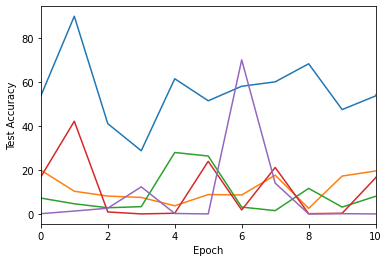

In [76]:
epochs = 10
accuracyx = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx.append(accuracy)



accuracyx1 = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net1(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx1.append(accuracy)

accuracyx2 = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net2(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx2.append(accuracy)

accuracyx3 = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net3(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx3.append(accuracy)

accuracyx4 = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net4(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx4.append(accuracy)

epochx4 = range(0,100)
epochx5 = range(0,200)
plt.plot(epochx5, accuracyx)
plt.plot(epochx4, accuracyx1)
plt.plot(epochx4, accuracyx2)
plt.plot(epochx4, accuracyx3)
plt.plot(epochx4, accuracyx4)
plt.xlim(0,10)
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")





Graph: Test accuracy vs epoch

The CNN (in blue) performs much better over time than the fully connected networks. This is because as the data becomes filtered down, the variance between potential classifications will become smaller, whereas in a fully connected neural network, the data is not getting reduced and so there is a higher amount of variation between potential predictions.

Part b

In [47]:

class Nets(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = torch.sigmoid(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x


nets = Nets()

In [48]:

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.258
[1,  4000] loss: 1.245
[1,  6000] loss: 1.225
[1,  8000] loss: 1.219
[1, 10000] loss: 1.204
[1, 12000] loss: 1.211
[2,  2000] loss: 1.141
[2,  4000] loss: 1.127
[2,  6000] loss: 1.127
[2,  8000] loss: 1.136
[2, 10000] loss: 1.138
[2, 12000] loss: 1.115
Finished Training


Test the data

Text(0.5, 0, 'Epoch')

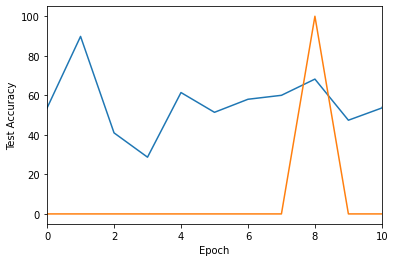

In [71]:
epochs = 10
accuracyx = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx.append(accuracy)



accuracyxs = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = nets(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyxs.append(accuracy)

epochx = range(0,100)
epochx3 = range(0,200)
plt.plot(epochx3, accuracyx)
plt.plot(epochx, accuracyxs)
plt.xlim(0,10)
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")


The relu network performs much better than the sigmoid network, because the signoid function is a binary classifier, so basically the relu function can be more accurate more of the time. It can get closer to being correct. 

Part C:

In [59]:
class Netdr(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = self.dropout(self.fc1(x))
        x = F.relu(x)
        x = self.dropout(self.fc2(x))
        x = F.relu(x)
        x = self.fc3(x)
        return x


netdr = Netdr()

In [60]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = netdr(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.305
[1,  4000] loss: 2.306
[1,  6000] loss: 2.307
[1,  8000] loss: 2.305
[1, 10000] loss: 2.305
[1, 12000] loss: 2.307
[2,  2000] loss: 2.306
[2,  4000] loss: 2.306
[2,  6000] loss: 2.306
[2,  8000] loss: 2.306
[2, 10000] loss: 2.307
[2, 12000] loss: 2.304
Finished Training


Text(0.5, 0, 'Epoch')

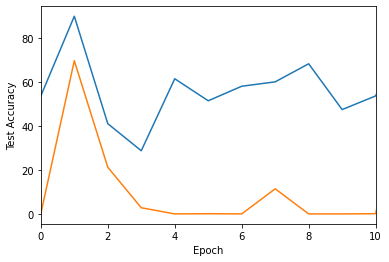

In [69]:
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = net(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyx.append(accuracy)



accuracyxdrtest = []
for i in range(epochs):
# prepare to count predictions for each class
  correct_pred = {classname: 0 for classname in classes}
  total_pred = {classname: 0 for classname in classes}


# again no gradients needed
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          outputs = netdr(images)
          _, predictions = torch.max(outputs, 1)
          # collect the correct predictions for each class
          for label, prediction in zip(labels, predictions):
              if label == prediction:
                  correct_pred[classes[label]] += 1
              total_pred[classes[label]] += 1

  for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      accuracyxdrtest.append(accuracy)


epochx = range(0,200)
epochx2 = range(0,100)
plt.plot(epochx, accuracyx)
plt.plot(epochx2, accuracyxdrtest)
plt.xlim(0,10)
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")



The CNN without dropout is more accurate. This is because in this instance, each of the neurons in the fully connected contains relevant information, so in dropping half of them, the model loses important information, making it less accurate. In the fully connected case, using dropout improves the efficiency, but since we have already reduced the input size, it is not necessary to use dropout in the CNN case.